# Download de dependências

In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d nelgiriyewithana/emotions

Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/emotions
License(s): other
 57% 9.00M/15.7M [00:00<00:00, 27.2MB/s]
100% 15.7M/15.7M [00:00<00:00, 40.7MB/s]


In [ ]:
!unzip emotions.zip

Archive:  emotions.zip
  inflating: text.csv                


In [ ]:
!kaggle datasets download -d jp797498e/twitter-entity-sentiment-analysis

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 3, in <module>
    from kaggle.api.kaggle_api_extended import KaggleApi
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/__init__.py", line 6, in <module>
    from kaggle.api.kaggle_api_extended import KaggleApi
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 31, in <module>
    import tempfile
  File "/usr/lib/python3.10/tempfile.py", line 614, in <module>
    class _TemporaryFileWrapper:
KeyboardInterrupt
^C


In [ ]:
!unzip twitter-entity-sentiment-analysis.zip

unzip:  cannot find or open twitter-entity-sentiment-analysis.zip, twitter-entity-sentiment-analysis.zip.zip or twitter-entity-sentiment-analysis.zip.ZIP.


In [ ]:
!pip install transformers

In [ ]:
!pip install transformers datasets

  Using cached datasets-2.21.0-py3-none-any.whl.metadata (21 kB)
  Using cached pyarrow-17.0.0-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (3.3 kB)
  Using cached dill-0.3.8-py3-none-any.whl.metadata (10 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.0 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, 

In [ ]:
!pip install transformers torch

In [ ]:
!pip install keras

ERROR: Operation cancelled by user


In [ ]:
!pip install tensorflow==2.12.0

In [ ]:
!pip install tensorflow-gpu==2.12.0

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


# DATASET EMOTIONS

# Verificando as classes

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df_inicial = pd.read_csv("text.csv")

df_inicial.columns = ['id', 'content', 'sentiment']

int_to_text = {
    0: 'sadness',
    1: 'joy',
    2: 'love',
    3: 'anger',
    4: 'fear',
    5: 'surprise'
}

df_inicial['sentiment'] = df_inicial['sentiment'].map(int_to_text)

df_inicial['sentiment'].value_counts()
# 0 sadness
# 1 joy
# 2 love
# 3 anger
# 4 fear
# 5 surprise


,count
sentiment,
joy,141067
sadness,121187
anger,57317
fear,47712
love,34554
surprise,14972


In [ ]:

# reduzir o tamanho de cada classe
sample_size = df_inicial['sentiment'].value_counts() * 0.4
sample_size = sample_size.astype(int)

# amostrar 40% dos dados de cada classe e combiná-los
df = df_inicial.groupby('sentiment').apply(lambda x: x.sample(sample_size[x.name], random_state=42)).reset_index(drop=True)

# verificar as novas contagens de cada classe
df['sentiment'].value_counts()


,count
sentiment,
joy,56426
sadness,48474
anger,22926
fear,19084
love,13821
surprise,5988


In [ ]:
df_val = df_inicial.drop(df.index)

sample_size = df_val['sentiment'].value_counts() * 0.1
sample_size = sample_size.astype(int)

# amostrar 10% dos dados de cada classe e combiná-los
df_val = df_val.groupby('sentiment').apply(lambda x: x.sample(sample_size[x.name], random_state=42)).reset_index(drop=True)

df_val['sentiment'].value_counts()

,count
sentiment,
joy,8480
sadness,7227
anger,3450
fear,2875
love,2082
surprise,892


# Pipeline 1 - Multinomial Naive Bayes

## Pré-processamento

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
i = 0
def preprocess(text):
    global i
    i += 1
    if i % 10000 == 0:
        print(f'{i} frases processadas')
    if not isinstance(text, str):
        return ''
    text = re.sub(r'http\S+', '', text)  # Removendo URLs
    text = re.sub(r'@\w+', '', text)  # Removendo menções
    text = re.sub(r'#\w+', '', text)  # Removendo hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Removendo caracteres especiais
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['clean_text'] = df['content'].apply(preprocess)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


10000 frases processadas
20000 frases processadas
30000 frases processadas
40000 frases processadas
50000 frases processadas
60000 frases processadas
70000 frases processadas
80000 frases processadas
90000 frases processadas
100000 frases processadas
110000 frases processadas
120000 frases processadas
130000 frases processadas
140000 frases processadas
150000 frases processadas
160000 frases processadas


## Dividindo os dados

In [ ]:
from sklearn.model_selection import train_test_split

# Divisão dos dados em treinamento e validação

X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['sentiment'], train_size=0.7, test_size=0.3, random_state=42)


## Vetorização do texto

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vetorização com TF-IDF

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

## Treinamento do modelo Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

modelmnb = MultinomialNB(alpha=0.1)
modelmnb.fit(X_train_vec, y_train)


MultinomialNB(alpha=0.1)

## Avaliação

In [ ]:
y_pred = modelmnb.predict(X_test_vec)
print(f'Acurácia: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Acurácia: 0.7852887076135636
              precision    recall  f1-score   support

       anger       0.89      0.70      0.78      6759
        fear       0.84      0.60      0.70      5761
         joy       0.74      0.94      0.83     16815
        love       0.85      0.38      0.52      4149
     sadness       0.79      0.91      0.84     14737
    surprise       0.85      0.21      0.34      1795

    accuracy                           0.79     50016
   macro avg       0.83      0.62      0.67     50016
weighted avg       0.80      0.79      0.77     50016



## Testes MNB

In [ ]:
tests = [
    "makes me really happy!",
    "sorrow sank deep inside my blood.",
    "shes hot omg",
    "im tired of it all.",
    "i must admit that she scares me",
    "this is unbelievable!",
    "just sit back down and learn from the best",
    "i dont know what happened i just cant believe it.",
    "the results shocked me",
    "shes surprised with that",
    "smh",      # bons exemplos de expressoes funcionando
    "idgaf",
    "idc bro",
    "im devoted to jesus christ",
    "the feelings i have for her are something different",
    "im always afraid someone is after me",
    "saying accidents happen is admirable acting", #alguns exemplos onde ele nao entende a conotacao correta (palavra admirable causa problema)
    "i care for her a lot and i really dont wanna mess up our relationship",
    "i feel like worshipping you",
    "i feel like worshipping the f outta you",
    "i must confess that i feel like a monster",
    "we all should agree that this was no surprise",
    "we should all agree he should be killed",
    "this is unconcievable, come back to me", # dois exemplos interessantes que mostram como a ordem importa
    "come back to me, this is unconcievable", # o modelo assume que o que vem primeiro eh o sentimento que a pessoa mais quer expressar
    "what a lovely bunny",
    "absolutely done with college.", # imprimiu anger para 'done'
    "my homework is done.",           # aqui, apesar de expressar alegria, por causa de 'done' o modelo achou que era raiva
    "amuse me with your unpretentious arms",  # exemplo onde nao deu certo por ser um vocabulario mais incomum (justificar que treinamos pouco)
    "feeling nice today!",
    "i'm not okay",
    "that's so bad!"
]

In [ ]:
index = 0

test_sentenc = tests
test_sentenc_vec = vectorizer.transform(test_sentenc)
test_predictions = modelmnb.predict(test_sentenc_vec)

for sent in tests:
    index += 1
    print(f'Tweet {index}:')
    print(sent)
    print(f'Previsão: {test_predictions[index-1]}')
    print("\n")

print(test_predictions)

Tweet 1:
makes me really happy!
Previsão: joy


Tweet 2:
sorrow sank deep inside my blood.
Previsão: joy


Tweet 3:
shes hot omg
Previsão: love


Tweet 4:
im tired of it all.
Previsão: sadness


Tweet 5:
i must admit that she scares me
Previsão: joy


Tweet 6:
this is unbelievable!
Previsão: sadness


Tweet 7:
just sit back down and learn from the best
Previsão: joy


Tweet 8:
i dont know what happened i just cant believe it.
Previsão: sadness


Tweet 9:
the results shocked me
Previsão: surprise


Tweet 10:
shes surprised with that
Previsão: surprise


Tweet 11:
smh
Previsão: sadness


Tweet 12:
idgaf
Previsão: joy


Tweet 13:
idc bro
Previsão: joy


Tweet 14:
im devoted to jesus christ
Previsão: love


Tweet 15:
the feelings i have for her are something different
Previsão: joy


Tweet 16:
im always afraid someone is after me
Previsão: fear


Tweet 17:
saying accidents happen is admirable acting
Previsão: sadness


Tweet 18:
i care for her a lot and i really dont wanna mess up our rela

## Matriz de confusão


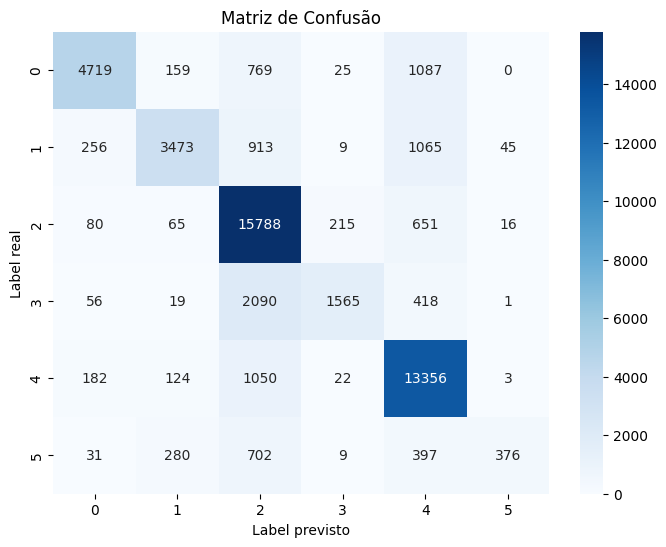

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score

# supondo que y_test são as labels verdadeiras e y_pred são as previsões do modelo
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Label previsto')
plt.ylabel('Label real')
plt.title('Matriz de Confusão')
plt.show()


# Pipeline 2 - DistilBERT

## Pré-processamento

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

i = 0
def preprocess(text):
    global i
    i += 1
    if i % 10000 == 0:
        print(f'{i} frases processadas')
    if not isinstance(text, str):
        return ''
    text = re.sub(r'http\S+', '', text)  # Removendo URLs
    text = re.sub(r'@\w+', '', text)  # Removendo menções
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Removendo caracteres especiais
    return text

df['clean_text'] = df['content'].apply(preprocess)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


10000 frases processadas
20000 frases processadas
30000 frases processadas
40000 frases processadas
50000 frases processadas
60000 frases processadas
70000 frases processadas
80000 frases processadas
90000 frases processadas
100000 frases processadas
110000 frases processadas
120000 frases processadas
130000 frases processadas
140000 frases processadas
150000 frases processadas
160000 frases processadas


## Treinamento do modelo


In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, AdamW, get_linear_schedule_with_warmup

class TweetDataset(Dataset):
    def __init__(self, tweets, labels, tokenizer, max_len):
        self.tweets = tweets
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

        # Corrigindo o mapeamento de labels para um dicionário
        self.label_map = {"sadness": 0, "joy": 1, "love": 2, "anger": 3, "fear": 4, "surprise": 5}

    def __len__(self):
        return len(self.tweets)

    def __getitem__(self, index):
        tweet = self.tweets[index]
        label = self.labels[index]

        # Conversão string->inteiro
        label_idx = self.label_map.get(label, -1)

        encoding = self.tokenizer.encode_plus(
            tweet,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'tweet_text': tweet,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label_idx, dtype=torch.long)
        }

# Carregando modelo e tokenizer padrões da biblioteca
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=6)

# Definindo DataLoader
tweets = df['content'].tolist()
labels = df['sentiment'].tolist()

train_dataset = TweetDataset(tweets, labels, tokenizer, max_len=128)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)  # Tamanho do batch maior


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
num_ep = 4
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Definindo optimizer e scheduler
optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
total_steps = len(train_loader) * num_ep

scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

loss_fn = torch.nn.CrossEntropyLoss().to(device)

# Loop de treinamento
for epoch in range(num_ep):
    model.train()
    for batch in train_loader:
        optimizer.zero_grad()

        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        scheduler.step()

# Salvando o modelo pré-treinado.
# Então, basta colocá-lo em um repositório em nuvem ou local
# para salvá-lo e não precisar treiná-lo de novo.
model.save_pretrained('pretrained_distilbert')
tokenizer.save_pretrained('pretrained_distilbert_tokenizer')

## Avaliação com modelo pré-treinado pela equipe



In [ ]:
from transformers import DistilBertForSequenceClassification, DistilBertTokenizer
import torch
from sklearn.metrics import f1_score

# Carregar o tokenizador
tokenizer = DistilBertTokenizer.from_pretrained('mattosinho/distilbert-emotions-6labels')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Carregar o modelo
model = DistilBertForSequenceClassification.from_pretrained('mattosinho/distilbert-emotions-6labels')
model.to(device)
# Colocar o modelo em modo de avaliação
model.eval()

# Definindo o DataLoader
validation_tweets = df_val['content'].tolist()
validation_labels = df_val['sentiment'].tolist()

eval_dataset = TweetDataset(validation_tweets, validation_labels, tokenizer, max_len=128)
eval_loader = DataLoader(eval_dataset, batch_size=16, shuffle=False)

correct_predictions = 0
total_predictions = 0
all_predictions = []
all_labels = []

# Loop de avaliação
for batch in eval_loader:
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    labels = batch['labels'].to(device)

    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=-1)
        correct_predictions += (predictions == labels).sum().item()
        total_predictions += labels.size(0)
        all_predictions.extend(predictions.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = correct_predictions / total_predictions
print(f'Acurácia de validação: {accuracy:.4f}')

f1 = f1_score(all_labels, all_predictions, average='weighted')
print(f'F1-score de validação: {f1:.4f}')


tokenizer_config.json:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/883 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Acurácia de validação: 0.9399
F1-score de validação: 0.9392


## Matriz de confusão

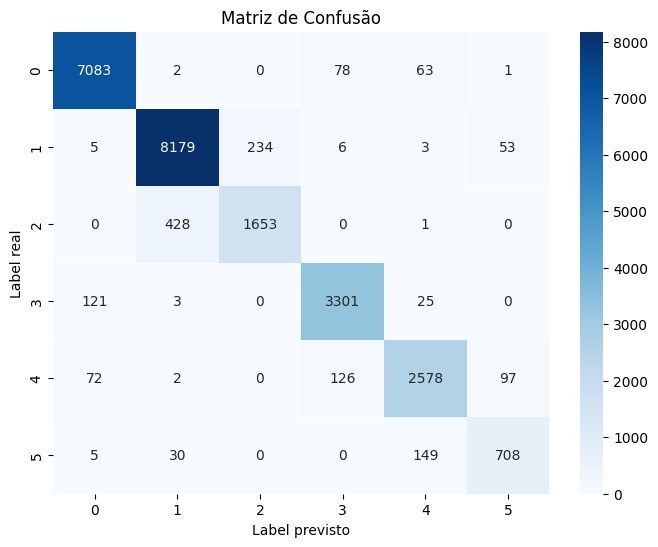

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score

cm = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Label previsto')
plt.ylabel('Label real')
plt.title('Matriz de Confusão')
plt.show()


## Testes DistilBERT

In [ ]:
tests = [
    "makes me really happy!",
    "sorrow sank deep inside my blood.",
    "shes fucking hot omg",
    "fuck that shit. im tired of it all.",
    "i must admit that she scares me",
    "this is unbelievable!",
    "just sit back down and learn from the best",
    "i dont know what happened i just cant believe it.",
    "the results shocked me",
    "shes surprised with that",
    "smh",      # bons exemplos de expressoes funcionando
    "idgaf",
    "idc bro",
    "im devoted to jesus christ",
    "the feelings i have for her are something different",
    "im always afraid someone is after me",
    "saying accidents happen is admirable acting", #alguns exemplos onde ele nao entende a conotacao correta (palavra admirable causa problema)
    "i care for her a lot and i really dont wanna mess up our relationship",
    "i feel like worshipping you",
    "i feel like worshipping the fuck outta you",
    "i must confess that i feel like a monster",
    "we all should agree that this was no surprise",
    "we should all agree he should be killed",
    "this is unconcievable, come back to me", # dois exemplos interessantes que mostram como a ordem importa
    "come back to me, this is unconcievable", # o modelo assume que o que vem primeiro eh o sentimento que a pessoa mais quer expressar
    "what a lovely bunny",
    "absolutely done with college.", # imprimiu anger para 'done'
    "my homework is done.",           # aqui, apesar de expressar alegria, por causa de 'done' o modelo achou que era raiva
    "amuse me with your unpretentious arms",  # exemplo onde nao deu certo por ser um vocabulario mais incomum (justificar que treinamos pouco)
]

inputs = tokenizer(tests, padding=True, truncation=True, return_tensors="pt")

In [ ]:
with torch.no_grad():
    outputs = model(**inputs.to(device))

# As saídas do modelo incluem logits (antes da softmax)
logits = outputs.logits
print(logits)

# Converter logits em probabilidades com softmax
probabilities = torch.softmax(logits, dim=-1)

# Obter as previsões
predictions = torch.argmax(probabilities, dim=-1)


tensor([[-2.3390,  8.0108, -2.5187, -4.3846, -4.2540, -4.8319],
        [ 7.7115, -2.8092, -3.6599, -3.2108, -1.9541, -3.8530],
        [-2.3123, -0.8157,  5.8560, -1.9570, -4.0770, -4.1278],
        [ 3.3438, -0.6251, -5.1269,  4.4300, -2.7248, -6.9069],
        [ 0.1213, -2.7757, -7.3589, -0.0375,  5.8344, -4.3289],
        [-2.8982,  2.0549, -4.5609, -1.8205, -2.8360,  2.7294],
        [-0.4278,  3.7733, -3.9191,  0.0209, -1.1550, -4.4628],
        [ 1.4622, -2.5496, -6.8502, -0.0544,  3.9255, -3.2848],
        [-4.2639, -0.5067, -4.1875, -2.9095, -3.5370,  5.9814],
        [-4.6388, -2.0506, -4.3296, -2.2744, -2.4061,  6.1851],
        [ 2.2516,  1.5798, -4.7372,  1.1550, -0.1286, -6.5009],
        [ 1.4056, -0.2792, -6.1711,  3.3355,  1.8509, -7.7336],
        [ 0.7752,  0.6564, -6.2722,  3.4720,  0.7663, -7.0645],
        [-0.3923,  1.2847,  4.0357, -3.0547, -3.5938, -5.3428],
        [ 1.7952,  2.1668, -1.6321, -3.5936, -2.3466, -2.8704],
        [-3.2010, -3.2625, -6.5038, -1.5

In [ ]:
print(predictions)

pred_to_text = {0: "sadness", 1: "joy", 2: "love", 3: "anger", 4: "fear", 5: "surprise"}

for i, pred in enumerate(predictions):
    print(f"Texto {i}: {tests[i]}")
    print(f"Previsão: {pred_to_text[pred.item()]}")
    print()


tensor([1, 0, 2, 3, 4, 5, 1, 4, 5, 5, 0, 3, 3, 2, 1, 4, 1, 0, 1, 2, 0, 1, 0, 3,
        0, 2, 3, 3, 3])
Texto 0: makes me really happy!
Previsão: joy

Texto 1: sorrow sank deep inside my blood.
Previsão: sadness

Texto 2: shes fucking hot omg
Previsão: love

Texto 3: fuck that shit. im tired of it all.
Previsão: anger

Texto 4: i must admit that she scares me
Previsão: fear

Texto 5: this is unbelievable!
Previsão: surprise

Texto 6: just sit back down and learn from the best
Previsão: joy

Texto 7: i dont know what happened i just cant believe it.
Previsão: fear

Texto 8: the results shocked me
Previsão: surprise

Texto 9: shes surprised with that
Previsão: surprise

Texto 10: smh
Previsão: sadness

Texto 11: idgaf
Previsão: anger

Texto 12: idc bro
Previsão: anger

Texto 13: im devoted to jesus christ
Previsão: love

Texto 14: the feelings i have for her are something different
Previsão: joy

Texto 15: im always afraid someone is after me
Previsão: fear

Texto 16: saying accidents ha

# DATASET TWITTER-ENTITY-SENTIMENT-ANALYSIS

# Verificando classes

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("twitter_training.csv")

df.columns = ['id', 'entity', 'sentiment', 'content']

df_val = pd.read_csv("twitter_validation.csv")

df_val.columns = ['id', 'entity', 'sentiment', 'content']

for sent in df['sentiment']:
  if sent == 'Irrelevant':
    df['sentiment'].replace(sent, 'Neutral', inplace=True)

for sent in df_val['sentiment']:
  if sent == 'Irrelevant':
    df_val['sentiment'].replace(sent, 'Neutral', inplace=True)

In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
Neutral,31308
Negative,22542
Positive,20831


In [ ]:
df_val['sentiment'].value_counts()

,count
sentiment,
Neutral,456
Positive,277
Negative,266


# Pipeline 1 - Multinomial Naive Bayes

## Pré-processamento

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
i = 0
def preprocess(text):
    global i
    i += 1
    if i % 10000 == 0:
        print(f'{i} tweets processados')
    if not isinstance(text, str):
        return ''
    text = re.sub(r'http\S+', '', text)  # Removendo URLs
    text = re.sub(r'@\w+', '', text)  # Removendo menções
    text = re.sub(r'#\w+', '', text)  # Removendo hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Removendo caracteres especiais
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['clean_text'] = df['content'].apply(preprocess)
df_val['clean_text'] = df_val['content'].apply(preprocess)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


10000 tweets processados
20000 tweets processados
30000 tweets processados
40000 tweets processados
50000 tweets processados
60000 tweets processados
70000 tweets processados


## Dividindo os dados

In [ ]:
from sklearn.model_selection import train_test_split

# Divisão dos dados em treinamento e validação

X_train = df['clean_text']
y_train = df['sentiment']

X_test = df_val['clean_text']
y_test = df_val['sentiment']

## Vetorização do texto

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vetorização com TF-IDF

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

## Treinamento

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

modelmnb = MultinomialNB(alpha=0.01)
modelmnb.fit(X_train_vec, y_train)


MultinomialNB(alpha=0.01)

## Avaliação

In [ ]:
y_pred = modelmnb.predict(X_test_vec)
print(f'Acurácia: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Acurácia: 0.9019019019019019
              precision    recall  f1-score   support

    Negative       0.87      0.92      0.89       266
     Neutral       0.95      0.89      0.92       456
    Positive       0.87      0.90      0.88       277

    accuracy                           0.90       999
   macro avg       0.89      0.90      0.90       999
weighted avg       0.90      0.90      0.90       999



## Matriz de confusão

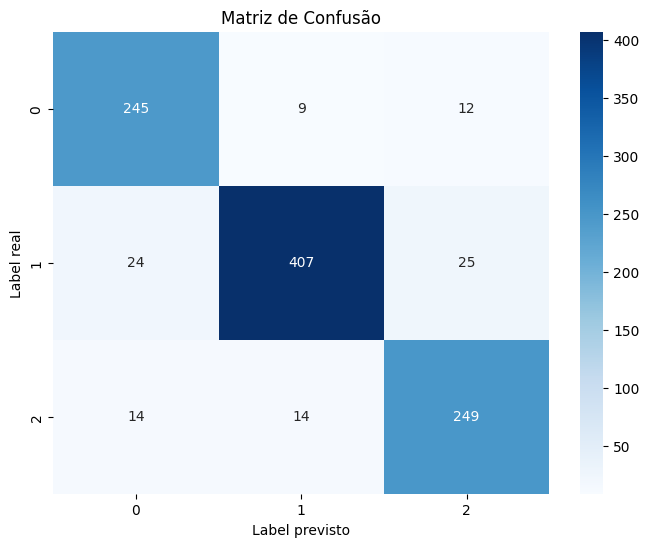

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score

# supondo que y_test são as labels verdadeiras e y_pred são as previsões do modelo
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Label previsto')
plt.ylabel('Label real')
plt.title('Matriz de Confusão')
plt.show()


## Testes

In [ ]:
tests = [
    "Microsoft should really reconsider their approaches.", # não avalia da forma correta porque não encontra palavras de teor negativo
    "Honestly, I'm really digging into pokemon speedruns lately...",
    "ducks are the best shit that has ever happened to earth lmao #loveducks", # não avalia da forma correta porque 1- exclui a hashtag, 2- 'best' e 'shit' se "anulam"
    "CS2 is ok, not much different from CSGO i guess", # avalia ok mais como positivo do que neutro
    "ffs do not buy the behringer umc22 audio interface...",
    "whos the responsible for spotifys algorithm? and how is he still employed?", # graças à simplicidade acaba não compreendendo a ligação entre as palavras
    "McDonalds excels in innovation but sacrifices ethics, fostering a toxic work culture and questionable supply chain practices.", # exemplo que não dá certo pelo vocabulário
    "Redditors tend to be really negative when facing something they dont agree with", # identifica a palavra "negative" e avalia a frase negativamente
    "NVIDIA is the goat" # exemplo que não dá certo por ser uma expressão desconhecida pelo modelo
]


In [ ]:
index = 0

test_sentenc = tests
test_sentenc_vec = vectorizer.transform(test_sentenc)
test_predictions = modelmnb.predict(test_sentenc_vec)

for sent in tests:
    index += 1
    print(f'Tweet {index}:')
    print(sent)
    print(f'Previsão: {test_predictions[index-1]}')


Tweet 1:
Microsoft should really reconsider their approaches.
Previsão: Neutral
Tweet 2:
Honestly, I'm really digging into pokemon speedruns lately...
Previsão: Positive
Tweet 3:
ducks are the best shit that has ever happened to earth lmao #loveducks
Previsão: Neutral
Tweet 4:
CS2 is ok, not much different from CSGO i guess
Previsão: Positive
Tweet 5:
ffs do not buy the behringer umc22 audio interface...
Previsão: Negative
Tweet 6:
whos the responsible for spotifys algorithm? and how is he still employed?
Previsão: Positive
Tweet 7:
McDonalds excels in innovation but sacrifices ethics, fostering a toxic work culture and questionable supply chain practices.
Previsão: Neutral
Tweet 8:
Redditors tend to be really negative when facing something they dont agree with
Previsão: Negative
Tweet 9:
NVIDIA is the goat
Previsão: Negative


# Pipeline 2 - DistilBERT

## Pré-processamento

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
i = 0
def preprocess(text):
    global i
    i += 1
    if i % 10000 == 0:
        print(f'{i} tweets processados')
    if not isinstance(text, str):
        return ''
    text = re.sub(r'http\S+', '', text)  # Removendo URLs
    text = re.sub(r'@\w+', '', text)  # Removendo menções
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Removendo caracteres especiais
    text.lower()
    return text

df['clean_text'] = df['content'].apply(preprocess)
df_val['clean_text'] = df_val['content'].apply(preprocess)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


10000 tweets processados
20000 tweets processados
30000 tweets processados
40000 tweets processados
50000 tweets processados
60000 tweets processados
70000 tweets processados


## Treinamento

In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, AdamW, get_linear_schedule_with_warmup

# Definindo a classe Dataset e DataLoader

class TweetDataset(Dataset):
    def __init__(self, tweets, labels, tokenizer, max_len):
        self.tweets = tweets
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

        # Mapeando as classificações para números
        self.label_map = {'Negative': 0, 'Neutral': 1, 'Positive': 2}

    def __len__(self):
        return len(self.tweets)

    def __getitem__(self, index):
        tweet = self.tweets[index]
        label = self.labels[index]

        # Conversão string->inteiro
        label_idx = self.label_map.get(label, -1)

        encoding = self.tokenizer.encode_plus(
            tweet,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'tweet_text': tweet,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label_idx, dtype=torch.long)
        }

# Carregando modelo e tokenizer padrões da biblioteca
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=3)

# Definindo DataLoader
tweets = df['clean_text'].tolist()
labels = df['sentiment'].tolist()

train_dataset = TweetDataset(tweets, labels, tokenizer, max_len=128)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
num_ep = 4
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Definindo optimizer e scheduler
optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
total_steps = len(train_loader) * num_ep

scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

loss_fn = torch.nn.CrossEntropyLoss().to(device)

# Loop de treinamento
for epoch in range(num_ep):
    model.train()
    for batch in train_loader:
        optimizer.zero_grad()

        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        scheduler.step()

# Salvando o modelo pré-treinado.
# Então, basta colocá-lo em um repositório em nuvem ou local
# para salvá-lo e não precisar treiná-lo de novo.
model.save_pretrained('pretrained_distilbert')
tokenizer.save_pretrained('pretrained_distilbert_tokenizer')

NameError: name 'torch' is not defined

## Avaliação

In [ ]:
from transformers import DistilBertForSequenceClassification, DistilBertTokenizer
import torch
from sklearn.metrics import f1_score

# Carregar o tokenizador
tokenizer = DistilBertTokenizer.from_pretrained('mattosinho/distilbert-twitter-sentiment-analysis-3labels')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Carregar o modelo
model = DistilBertForSequenceClassification.from_pretrained('mattosinho/distilbert-twitter-sentiment-analysis-3labels')
model.to(device)
# Colocar o modelo em modo de avaliação
model.eval()

# Definindo o DataLoader
validation_tweets = df_val['clean_text'].tolist()
validation_labels = df_val['sentiment'].tolist()

eval_dataset = TweetDataset(validation_tweets, validation_labels, tokenizer, max_len=128)
eval_loader = DataLoader(eval_dataset, batch_size=16, shuffle=False)

correct_predictions = 0
total_predictions = 0
all_predictions = []
all_labels = []

# Loop de avaliação
for batch in eval_loader:
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    labels = batch['labels'].to(device)

    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=-1)
        correct_predictions += (predictions == labels).sum().item()
        total_predictions += labels.size(0)
        all_predictions.extend(predictions.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = correct_predictions / total_predictions
print(f'Acurácia de validação: {accuracy:.4f}')

f1 = f1_score(all_labels, all_predictions, average='weighted')
print(f'F1-score de validação: {f1:.4f}')


tokenizer_config.json:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/769 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Acurácia de validação: 0.9780
F1-score de validação: 0.9780


## Matriz de confusão

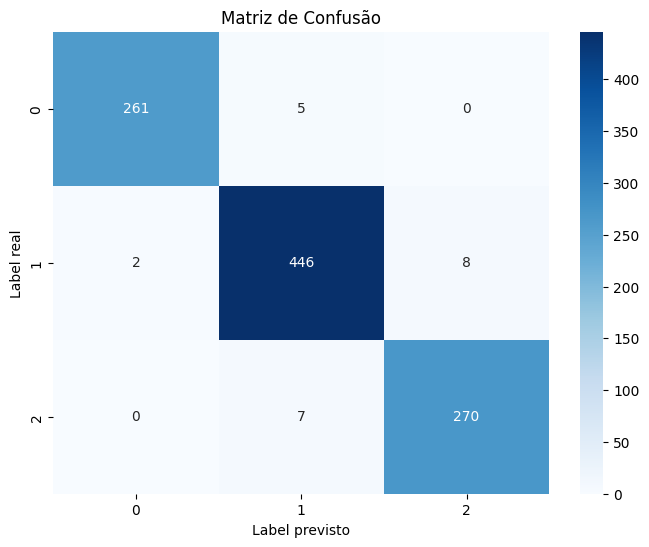

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score

cm = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Label previsto')
plt.ylabel('Label real')
plt.title('Matriz de Confusão')
plt.show()

## Testes

In [ ]:
# Exemplo de texto para avaliação

tests = [
    "Microsoft should really reconsider their approaches.",
    "Honestly, I'm really digging into pokemon speedruns lately...",
    "ducks are the best shit that has ever happened to earth lmao #loveducks",
    "CS2 is ok, not much different from CSGO i guess",
    "ffs do not buy the behringer umc22 audio interface...",
    "whos the responsible for spotifys algorithm? and how is he still employed?",
    "McDonalds excels in innovation but sacrifices ethics, fostering a toxic work culture and questionable supply chain practices.", # exemplo que não dá certo pelo vocabulário
    "Redditors tend to be really negative when facing something they dont agree with",
    "NVIDIA is the goat" # exemplo que não dá certo por ser uma expressão desconhecida pelo modelo
]

# Tokenizar os textos
inputs = tokenizer(tests, padding=True, truncation=True, return_tensors="pt")


In [ ]:
# Desativar o cálculo de gradientes para economizar memória
with torch.no_grad():
    outputs = model(**inputs.to(model.device))

# As saídas do modelo incluem logits (antes da softmax)
logits = outputs.logits
print(logits)

# Converter logits em probabilidades com softmax
probabilities = torch.softmax(logits, dim=-1)

# Obter as previsões
predictions = torch.argmax(probabilities, dim=-1)

tensor([[ 5.3003, -3.6188, -2.9695],
        [-0.4728, -1.7394,  1.6384],
        [-3.4479,  1.0488,  1.7705],
        [-1.1152,  2.1306, -1.9260],
        [ 4.0261, -2.7702, -2.1370],
        [ 2.7996,  0.4450, -4.6696],
        [-1.4131, -1.2555,  2.1295],
        [-2.0021,  4.5599, -3.7974],
        [ 4.1798, -2.9979, -2.2104]], device='cuda:0')


In [ ]:
# Imprimir as previsões

pred_to_text = {0: "Negative", 1: "Neutral", 2: "Positive"}

for i, pred in enumerate(predictions):
    print(f"Texto {i}: {tests[i]}")
    print(f"Previsão: {pred_to_text[pred.item()]}")
    print()

Texto 0: Microsoft should really reconsider their approaches.
Previsão: Negative

Texto 1: Honestly, I'm really digging into pokemon speedruns lately...
Previsão: Positive

Texto 2: ducks are the best shit that has ever happened to earth lmao #loveducks
Previsão: Positive

Texto 3: CS2 is ok, not much different from CSGO i guess
Previsão: Neutral

Texto 4: ffs do not buy the behringer umc22 audio interface...
Previsão: Negative

Texto 5: whos the responsible for spotifys algorithm? and how is he still employed?
Previsão: Negative

Texto 6: McDonalds excels in innovation but sacrifices ethics, fostering a toxic work culture and questionable supply chain practices.
Previsão: Positive

Texto 7: Redditors tend to be really negative when facing something they dont agree with
Previsão: Neutral

Texto 8: NVIDIA is the goat
Previsão: Negative

